In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load the dataset
data = pd.read_csv('../../src/data/water_quality.csv')

# Display the first few rows of the dataset
print(data.head())

     Ph   Turbidity  Temperature  Conductivity  Label
0  7.01  706.101031    20.529632    342.543917      1
1  7.25  721.232354    25.355915    325.120790      1
2  6.88  596.178640    29.599519    365.238751      1
3  7.89  674.121989    11.838675    259.524332      1
4  8.21  505.266735    14.167877    298.184947      1


In [3]:
# Features (X) and Labels (y)
X = data.drop('Label', axis=1).values
y = data['Label'].values

In [4]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Standardize the features (mean=0, variance=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [7]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (1/m) * (-y.T @ np.log(h) - (1 - y).T @ np.log(1 - h))
    return cost

In [8]:
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []

    for _ in range(num_iterations):
        h = sigmoid(X @ theta)
        gradient = (1/m) * (X.T @ (h - y))
        theta -= learning_rate * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

In [9]:
# Add a column of ones to X_train and X_test for the intercept term
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Initialize parameters
theta = np.zeros(X_train.shape[1])
learning_rate = 0.01
num_iterations = 1000

# Train the model
theta, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, num_iterations)

In [10]:
def predict(X, theta):
    return (sigmoid(X @ theta) >= 0.5).astype(int)

# Predict on the test set
y_pred = predict(X_test, theta)

In [11]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 88.47%


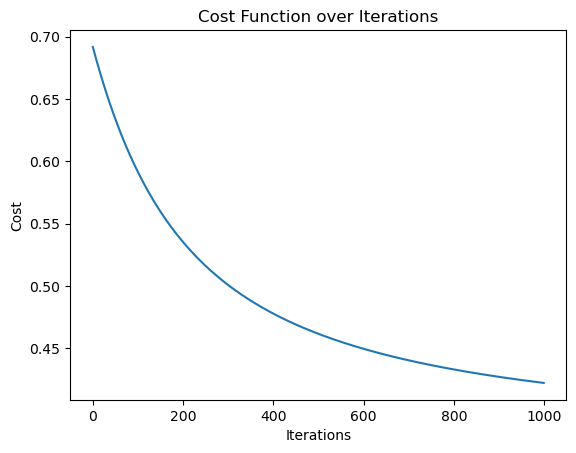

In [12]:
plt.plot(range(num_iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()

Confusion Matrix:
[[713 189]
 [  7 791]]
Accuracy: 88.47%
Precision: 0.8071
Recall: 0.9912
F1-Score: 0.8898


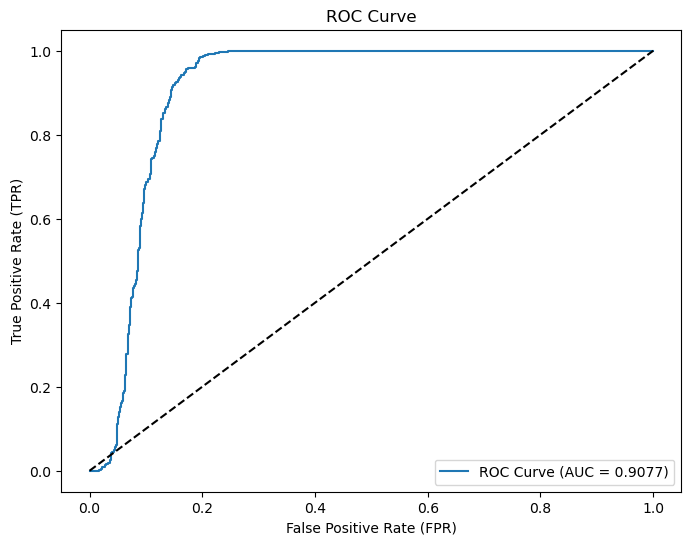

AUC Score: 0.9077


In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

# Predict on the test set
y_pred = predict(X_test, theta)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

# ROC Curve and AUC
y_pred_prob = sigmoid(X_test @ theta)  # Predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

print(f"AUC Score: {auc_score:.4f}")